# Modelos Epidemiológicos

## Implementação da função sigmoide assimétrica
Modelo utilizado pelo artigo da ASOC:
$$f(t) = \frac{A}{\left(1 + \nu e^{-\frac{(t - t_p)}{\delta}}\right)^{\frac{1}{\nu}}}$$
$$\frac{df(t)}{dt} = \frac{A}{\delta} \frac{g(t)}{(1 + \nu g(t))^{\frac{\nu +1}{\nu}})}$$

onde $g(t) = e^{-\frac{(t - t_p)}{\delta}}$

Parâmetros:
- $A$: total de ocorrências
- $t_p$: ponto de inflexão
- $\delta$: duração da onda
- $\nu$: grau de assimetria.

Código:

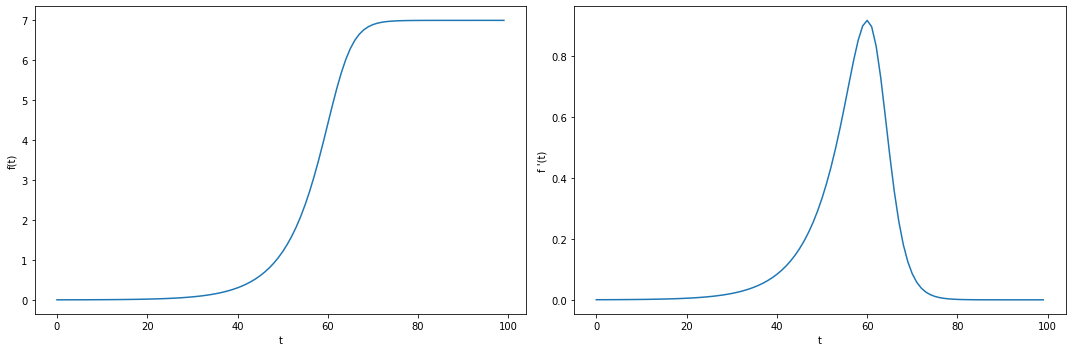

In [2]:
import numpy as np
import matplotlib.pyplot as plt

'''
f(t) - Richards Model (Assymetric Sigmoid)
t: time array
A, tp, delta, nu: model parameters
'''
def f_t(t, A, tp, delta, nu ):
    return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))

# Vectorized version of f(t)
f_t = np.vectorize(f_t)

'''
f'(t) -Derivative of f(t) with respect to t
'''
def deriv_f_t(t, A, tp, delta, nu ):
    g = lambda x: np.exp(-1*(t - tp)/delta)
    return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))

# Vectorized version of df(t)/dt
deriv_f_t = np.vectorize(deriv_f_t)


# Define time array
t = np.arange(0, 50, 0.5) # start / end / step 

# Initialize model parameters
A = 7
tp = 30
delta = 1.2
nu = 3


fig, axs = plt.subplots(1, 2, figsize=(15,5)) # 1 row, 2 cols
plt.rc('axes', labelsize=16)
#Plot f(t)
axs[0].plot(f_t(t, A, tp, delta, nu))
axs[0].set_xlabel('t')
axs[0].set_ylabel('f(t)')

#Plot df(t)/dt
axs[1].plot(deriv_f_t(t, A, tp, delta, nu))
axs[1].set_xlabel('t')
axs[1].set_ylabel("f '(t)")

fig.tight_layout() # fix spacing between subplots
plt.show()

## 2 - Rodando algumas simulações

### 2.1 - Simulação do artigo da ASOC
$A$ = 10, $t_p$ = 5, e $\delta$ = 1
Variando o valor de $\nu$

Código:

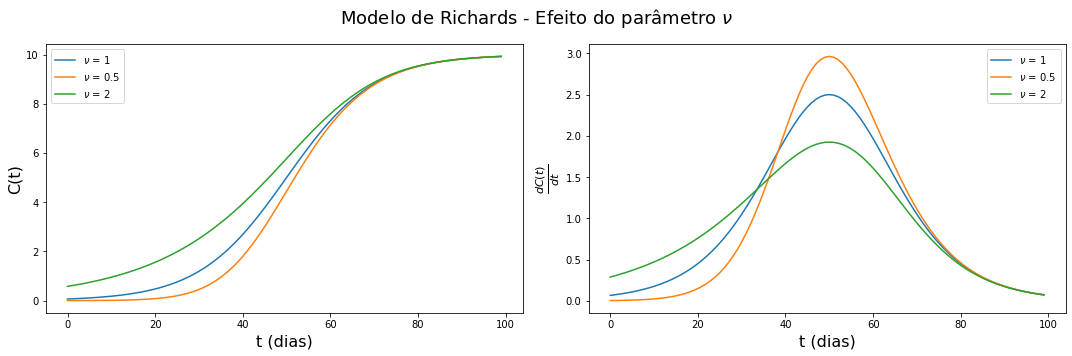

In [12]:
# Define time array
t = np.arange(0, 10, 0.1) # start / end / step 

# Model parameters
A = 10
tp = 5
delta = 1

fig, axs = plt.subplots(1, 2, figsize=(15,5)) # 1 row, 2 cols
plt.rc('axes', labelsize=16)
#fig.suptitle(r'Testes artigo ASOC ($A$ = 10, $t_p$ = 5, e $\delta$ = 1)', fontsize=18)
fig.suptitle(r'Modelo de Richards - Efeito do parâmetro $\nu$', fontsize=18)
#Plot f(t)
axs[0].plot(f_t(t, A, tp, delta, 1.0), label='$\\nu$ = 1') # nu = 1
axs[0].plot(f_t(t, A, tp, delta, 0.5), label='$\\nu$ = 0.5') # nu = 0.5
axs[0].plot(f_t(t, A, tp, delta, 2.0), label='$\\nu$ = 2') # nu = 2
axs[0].legend()
axs[0].set_xlabel('t (dias)')
axs[0].set_ylabel('C(t)')

#Plot df(t)/dt
axs[1].plot(deriv_f_t(t, A, tp, delta, 1.0), label='$\\nu$ = 1') # nu = 1
axs[1].plot(deriv_f_t(t, A, tp, delta, 0.5), label='$\\nu$ = 0.5') # nu = 0.5
axs[1].plot(deriv_f_t(t, A, tp, delta, 2.0), label='$\\nu$ = 2') # nu = 2
axs[1].legend()
axs[1].set_xlabel('t (dias)')
axs[1].set_ylabel(r"$\frac{dC(t)}{dt}$")

fig.tight_layout() # fix spacing between subplots
plt.savefig('richards-asymmetry.png')
plt.show()


### Simulação Interativa para execução no Google Colab

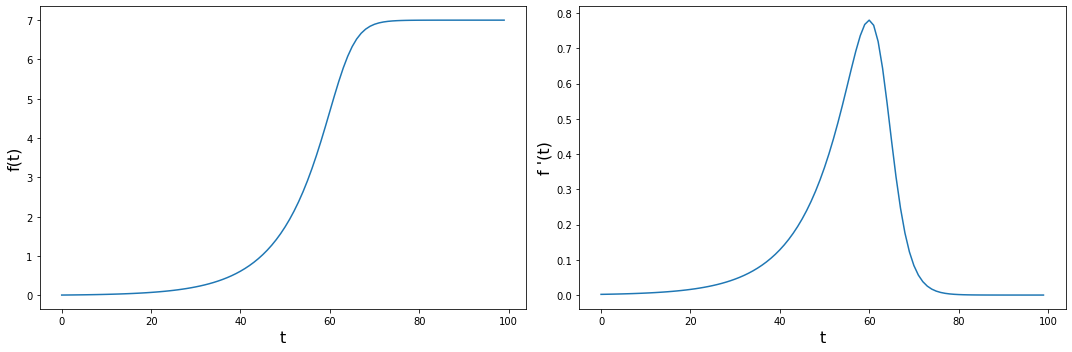

In [4]:
#@title Parâmetros { run: "auto", vertical-output: true }
A = 7 #@param {type:"number"}
tp = 30 #@param {type:"number"}
delta = 1.2 #@param {type:"number"}
nu = 4 #@param {type:"number"}

# Define time array
t = np.arange(0, 50, 0.5) # start / end / step 

fig, axs = plt.subplots(1, 2, figsize=(15,5)) # 1 row, 2 cols
plt.rc('axes', labelsize=16)
#Plot f(t)
axs[0].plot(f_t(t, A, tp, delta, nu))
axs[0].set_xlabel('t')
axs[0].set_ylabel('f(t)')

#Plot df(t)/dt
axs[1].plot(deriv_f_t(t, A, tp, delta, nu))
axs[1].set_xlabel('t')
axs[1].set_ylabel("f '(t)")

fig.tight_layout() # fix spacing between subplots
plt.show()

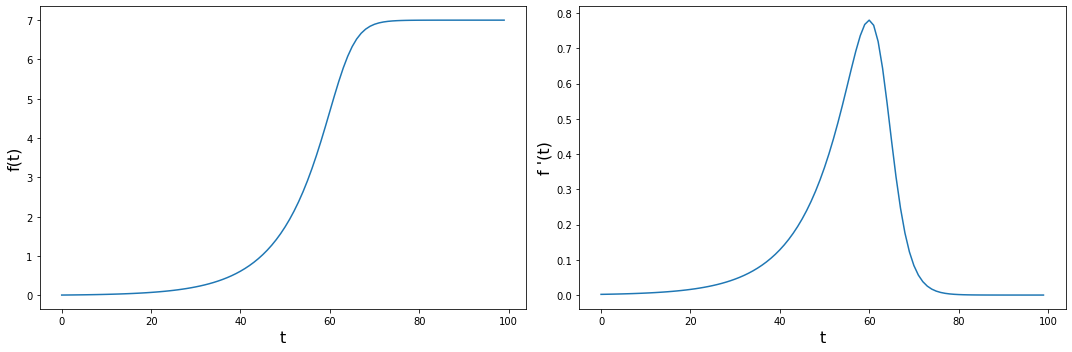

In [5]:
A = 7 
tp = 30 
delta = 1.2 
nu = 4 

# Define time array
t = np.arange(0, 50, 0.5) # start / end / step 

fig, axs = plt.subplots(1, 2, figsize=(15,5)) # 1 row, 2 cols
plt.rc('axes', labelsize=16)
#Plot f(t)
axs[0].plot(f_t(t, A, tp, delta, nu))
axs[0].set_xlabel('t')
axs[0].set_ylabel('f(t)')

#Plot df(t)/dt
axs[1].plot(deriv_f_t(t, A, tp, delta, nu))
axs[1].set_xlabel('t')
axs[1].set_ylabel("f '(t)")

fig.tight_layout() # fix spacing between subplots
plt.show()